In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import plotting
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiSpheresMasker
from numpy import genfromtxt

In [2]:
# Init var
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
first_level_path = analysis_folder+'first_level/'

glover_path = analysis_folder+'first_level/glover/mask_ROIs/'
spm_path = analysis_folder+'first_level/spm/mask_ROIs/'
gamma_path = analysis_folder+'first_level/rat_hrf_gamma_diff/mask_ROIs/'
dd_path = analysis_folder+'first_level/rat_hrf_delay_disp/mask_ROIs/'

hrf_path = glover_path
hrf = 'glover'
#hrf = 'rat_hrf_delay_disp'
#hrf = 'rat_hrf_gamma_diff'



In [45]:
# --- Load data ---

subj_num = 201900

residuals_csv = pd.read_csv(hrf_path+'residuals/residuals_sub-0{}_ses-1.csv'.format(subj_num))
residuals_csv = ((residuals_csv - np.mean(residuals_csv)) / np.std(residuals_csv))
mean_residuals = residuals_csv.mean(axis=1)

timeseries_csv = pd.read_csv(hrf_path+'real_timeseries/real_timeseries_sub-0{}_ses-1.csv'.format(subj_num))
timeseries_csv = ((timeseries_csv - np.mean(timeseries_csv)) / np.std(timeseries_csv))
mean_timeseries = timeseries_csv.mean(axis=1)


glover_hrf_model = pd.read_csv(first_level_path+'{}/matrix/matrix_sub-0{}_ses-1.csv'.format(hrf, subj_num))
glover_hrf_model = glover_hrf_model.iloc[:, 0]

/home/traaffneu/margal/anaconda3/envs/MultiRatSe/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/traaffneu/margal/anaconda3/envs/MultiRatSe/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


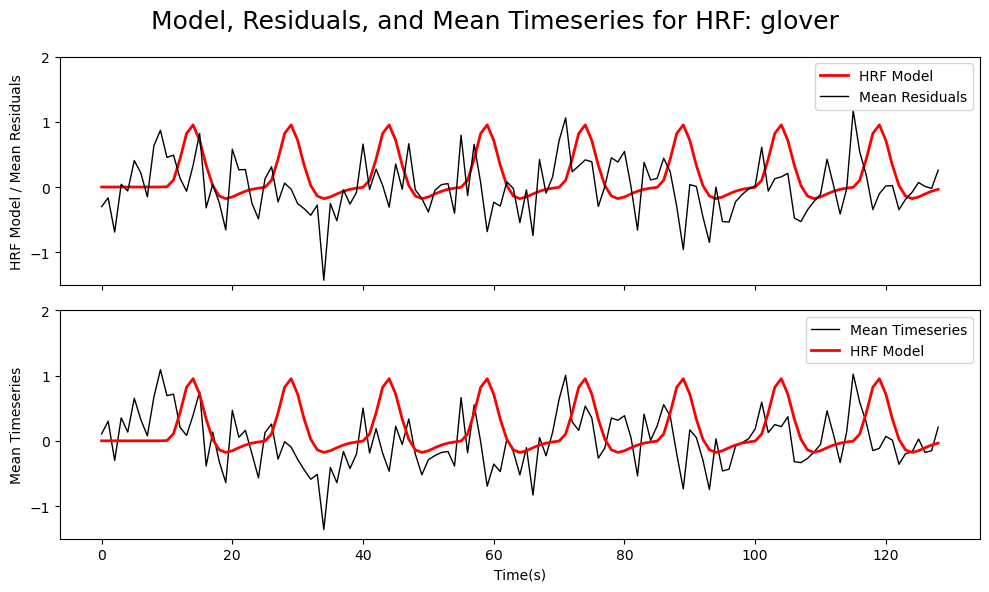

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot model and residuals in the first subplot (ax1)
ax1.plot(glover_hrf_model, color='red', linewidth=2, label='HRF Model')
ax1.plot(mean_residuals, color='black', linewidth=1, label='Mean Residuals')
ax1.set_ylabel('HRF Model / Mean Residuals')
ax1.set_ylim(-1.5, 1.8)
ax1.set_yticks([-1, 0, 1, 2])
ax1.legend()

# Plot mean timeseries in the second subplot (ax2)
ax2.plot(mean_timeseries, color='black', linewidth=1, label='Mean Timeseries')
ax2.plot(glover_hrf_model, color='red', linewidth=2, label='HRF Model')

ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Mean Timeseries')
ax2.set_ylim(-1.5, 1.8)
ax2.set_yticks([-1, 0, 1, 2])
ax2.legend()

fig.suptitle("Model, Residuals, and Mean Timeseries for HRF: {}".format(hrf), fontsize=18)

plt.tight_layout()

plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_sec_level/model_residuals/{}_signals_{}.svg'.format(hrf, subj_num), format='svg', dpi=1200) 

# Display the plot
plt.show()


In [18]:
# Create a list of integers from 1 to 100
list_of_integers = [i for i in range(1, 958)]

# Create a list of 100 ones
list_of_ones = [1] * 957



print(list_of_integers)
print(list_of_ones)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

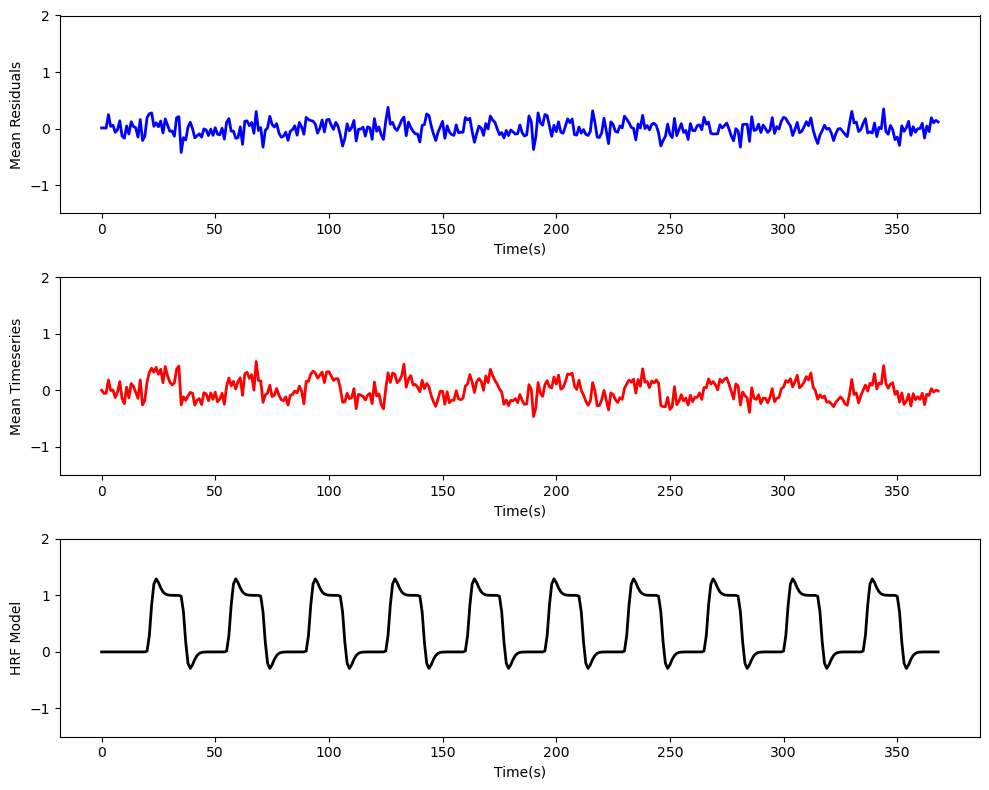

In [5]:
# --- Plot: residuals, timeseries, models ---
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot mean_residuals
axes[0].plot(mean_residuals, color='blue', linewidth=2)
axes[0].set_xlabel('Time(s)')
axes[0].set_ylabel('Mean Residuals')
axes[0].set_ylim(-1.5, 1.8)
axes[0].set_yticks([-1, 0, 1, 2])

# Plot mean_timeseries
axes[1].plot(mean_timeseries, color='red', linewidth=2)
axes[1].set_xlabel('Time(s)')
axes[1].set_ylabel('Mean Timeseries')
axes[1].set_ylim(-1.5, 1.8)
axes[1].set_yticks([-1, 0, 1, 2])

# Plot glover_hrf_model
axes[2].plot(glover_hrf_model, color='black', linewidth=2)
axes[2].set_xlabel('Time(s)')
axes[2].set_ylabel('HRF Model')
axes[2].set_ylim(-1.5, 1.8)
axes[2].set_yticks([-1, 0, 1, 2])

plt.tight_layout()
#plt.savefig('/project/4180000.19/multirat_stim/scratch/plots/compare_hrf/dd_model_signals.svg', format='svg', dpi=1200) 

plt.show()

Cluster 0 peak[4.06000096 1.3900013  4.33500057]

Cluster 1 peak[-5.83999944  1.3900013   4.63500059]

Cluster 2 peak[ 0.1600008  -5.80999899  5.83500063]

Cluster 3 peak[-0.13999921 -2.80999887  4.9350006 ]

Cluster 4 peak[-0.73999923 -4.60999894  6.13500065]



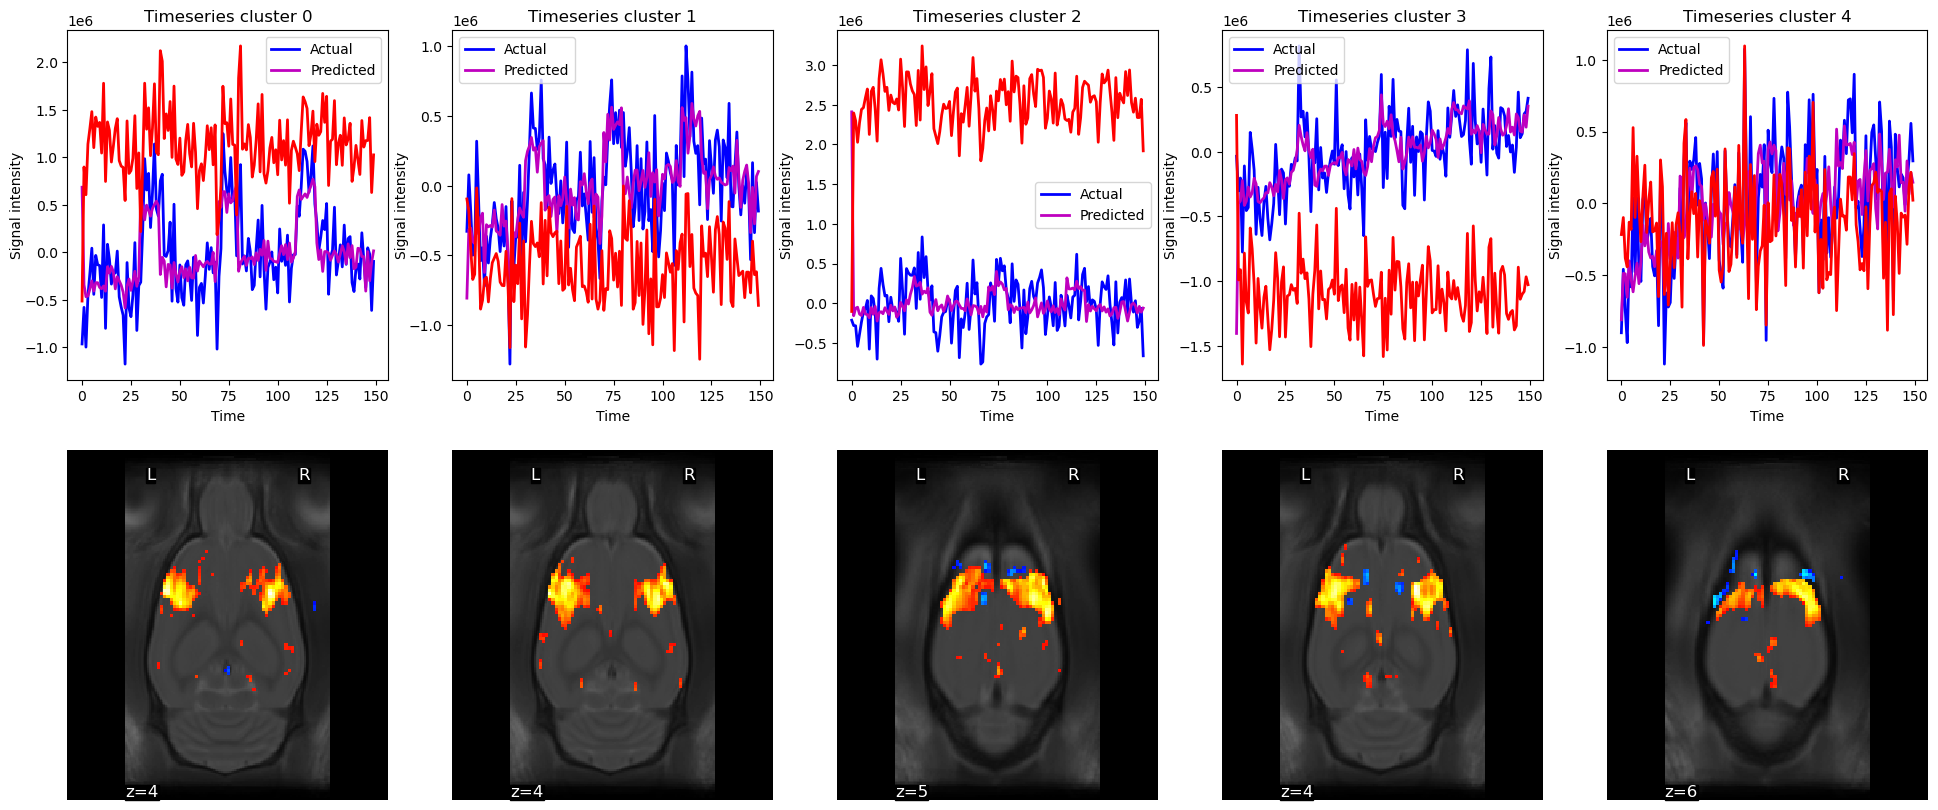

In [3]:
# -- Plot timeseries per cluster -- 

template_path ='/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'

#Load variables
residuals = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/residuals/clusters_residuals_sub-0200100_ses-1.csv', delimiter=',')
predicted_timeseries = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/predicted_timeseries/cluster_predicted_timeseries_sub-0200100_ses-1.csv', delimiter=',')
timeseries = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/timeseries/cluster_timesries_sub-0200100_ses-1.csv', delimiter=',')
coords = genfromtxt('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/coords/cluster_timesries_sub-0200100_ses-1.csv', delimiter=',')
zscore_map = nib.load('/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/z_score/z_score_sub-0200100_ses-1.nii.gz')

#Correct for differences in baseline levels between the predicted and real time series
predicted_mean = np.mean(predicted_timeseries, axis=0)
real_mean = np.mean(timeseries, axis=0)

corrected_predicted = np.subtract(predicted_timeseries, predicted_mean)
corrected_real = np.subtract(timeseries, real_mean)

fig1, axs1 = plt.subplots(2, len(coords))

for i in range(0, len(coords)):
    axs1[0, i].set_title("Timeseries cluster {}".format(i))

    axs1[0, i].plot(corrected_real[:, i], c='b', lw=2, label="Actual")
    axs1[0, i].plot(corrected_predicted[:, i], c="m", ls="-", lw=2, label="Predicted")
    axs1[0, i].plot(residuals[:, i], c='r', lw=2)
    axs1[0, i].legend()

    axs1[0, i].set_xlabel("Time")
    axs1[0, i].set_ylabel("Signal intensity", labelpad=0)
   
   
# plotting image below the time series 
    #To change maps, check:https://www.kaggle.com/code/soham1024/visualization-using-nilearn                      
    roi_img = plotting.plot_stat_map(zscore_map,                            
                                    cut_coords=[coords[i][2]],
                                    threshold=3.1,
                                    figure=fig1,
                                    axes=axs1[1, i],
                                    display_mode="z",
                                    colorbar=False,
                                    bg_img = template_path)
    
    fig1.set_size_inches(24, 10)
    print('Cluster {} peak'.format(i)+f'{coords[i]}\n')

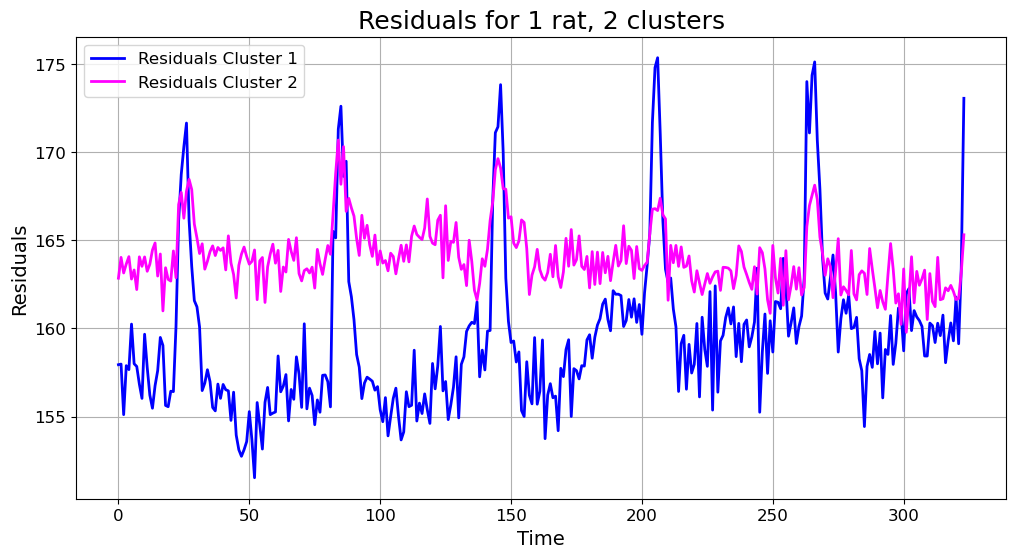

In [97]:
#plot clusters' residuals from first level analysis 

residuals_path = '/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/clusters/Residuals_cluster_sub-0200201_ses-1.csv'
residuals = pd.read_csv(residuals_path, sep=',')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(residuals.to_numpy()[:, 0], color='blue', linewidth=2, label='Residuals Cluster 1')
ax.plot(residuals.to_numpy()[:, 1], color='magenta', linewidth=2, label='Residuals Cluster 2')

# customize the plot
ax.set_title("Residuals for 1 rat, 2 clusters", fontsize=18)
ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Residuals", fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(True)
ax.legend(fontsize=12)

# display the plot
plt.show()
